# Display the results of 10x10 cross-validation fine-tuning experiment for seBERT with RandomForest as baseline

In [1]:
%matplotlib inline
import glob

import pandas as pd
import matplotlib.pyplot as plt

PARTS_DATA = '../ft/parts/*.csv'

In [18]:
dfs = []
for file_name in glob.glob(PARTS_DATA):
    df = pd.read_csv(file_name)
    dfs.append(df)
df = pd.concat(dfs).reset_index()

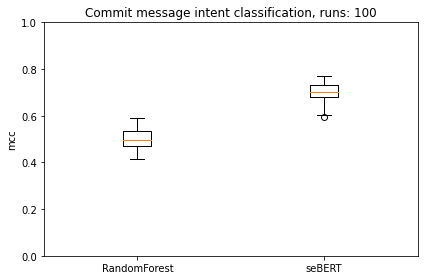

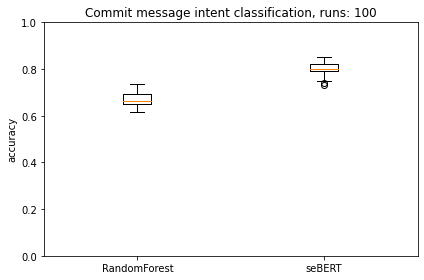

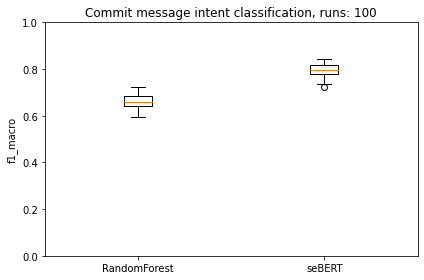

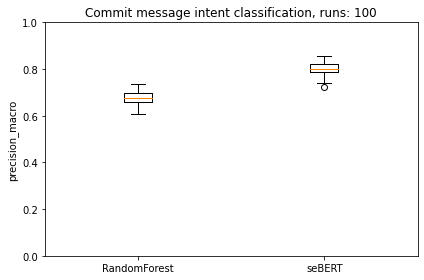

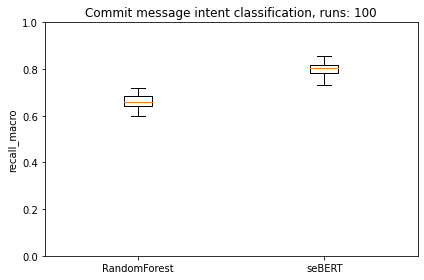

In [20]:
# only for webseite
for metric in ['mcc', 'accuracy', 'f1_macro', 'precision_macro', 'recall_macro']:

    rf = df[df['model'] == 'RandomForest'][metric]
    se = df[df['model'] == 'seBERT'][metric]

    fig = plt.figure()
    ax = fig.gca()
    ax.set_title("Commit message intent classification, runs: {}".format(len(se)))
    ax.boxplot([rf, se])
    ax.set_ylabel(metric)
    ax.set_ylim([0,1])
    ax.set_xticklabels(['RandomForest', 'seBERT'])
    plt.tight_layout()
    plt.savefig('../website/images/benchmark_{}.png'.format(metric))
    plt.show()

In [11]:
print('median f1:', df[df['model'] == 'seBERT']['f1_macro'].median(), 'median mcc:', df[df['model'] == 'seBERT']['mcc'].median(), 'median acc:', df[df['model'] == 'seBERT']['accuracy'].median())

median f1: 0.7981999013760392 median mcc: 0.7034815045786439 median acc: 0.8023715415019763


In [4]:
print('mean f1:', df[df['model'] == 'seBERT']['f1_macro'].mean(), 'mean mcc:', df[df['model'] == 'seBERT']['mcc'].mean(), 'mean acc:', df[df['model'] == 'seBERT']['accuracy'].mean())

mean f1: 0.7985137951054989 median mcc: 0.7042245381477171 median acc: 0.8036724658429553
